In [1]:
# Set-up y vista rápida de una muestra
import pandas as pd
import matplotlib.pyplot as plt

events_df = pd.read_csv('events.csv', low_memory=False)
events_df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
events_df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


### 1. Analizar cuál es el tipo de evento predominante en el set de datos.

In [3]:
eventos = events_df['event'].value_counts()
evento_predominante = eventos.index[0]

# El evento predominante es.......
evento_predominante

'viewed product'

In [4]:
# Lista entera
eventos

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

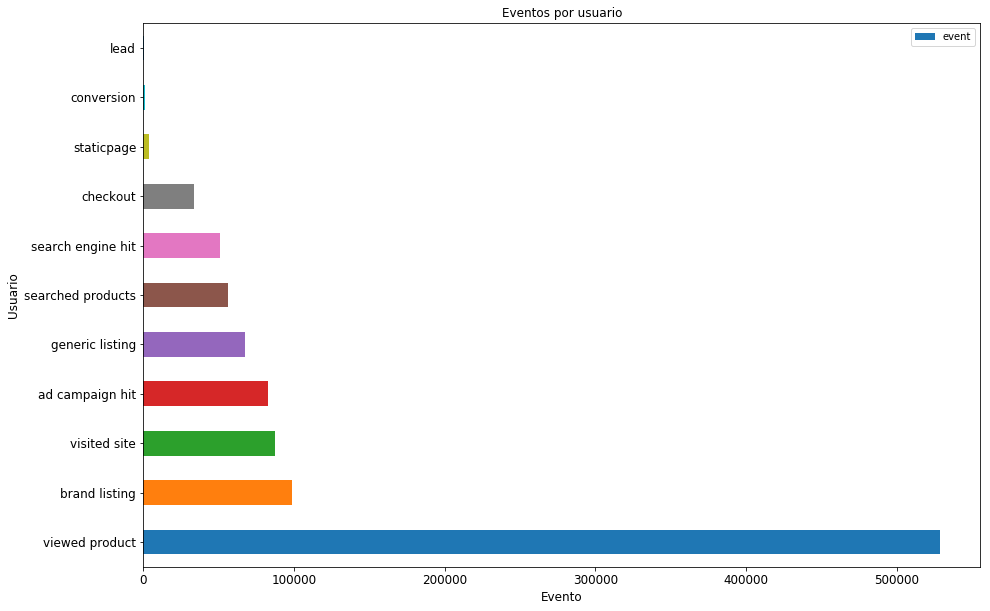

In [5]:
# Siendo una variable categórica, se puede ver cómodamente en un gráfico de barras

ax = eventos.plot(kind='barh', title ="Eventos por usuario", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Evento", fontsize=12)
ax.set_ylabel("Usuario", fontsize=12)
plt.show()

### 2. Calcular cuales son los 5 productos (identificados por sku) con mayor cantidad de conversiones.

In [6]:
productos_comprados = events_df.loc[events_df['event'] == 'conversion']
productos_comprados = productos_comprados['sku'].value_counts()
top_5 = productos_comprados.head(5)
top_5

6371.0    30
6370.0    18
7631.0    17
2692.0    16
3371.0    14
Name: sku, dtype: int64

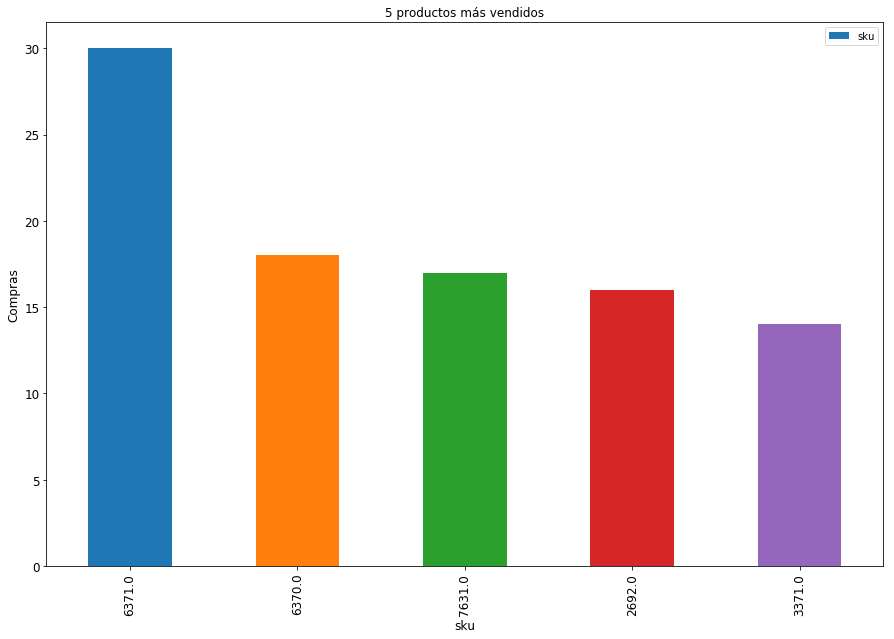

In [7]:
ax = top_5.plot(kind='bar', title ="5 productos más vendidos", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("sku", fontsize=12)
ax.set_ylabel("Compras", fontsize=12)
plt.show()

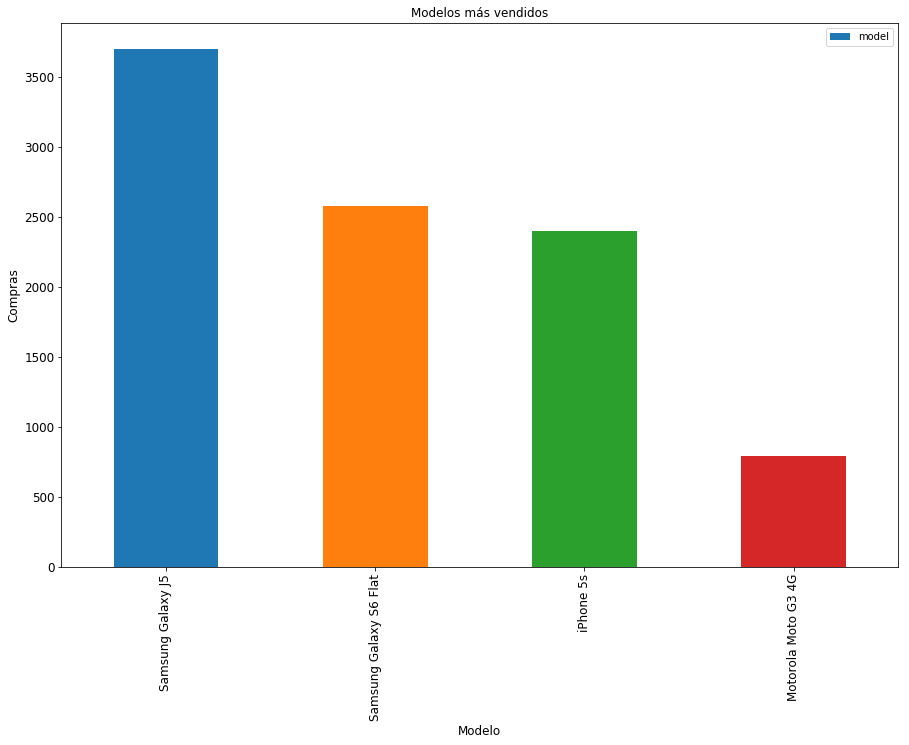

In [8]:
# A un emprendedor no le sirve decir 'El celular que más vendio es el 2692...' Queremos nombres de celulares!
# A que modelo refiere el sku? 

modelos = events_df.loc[events_df['sku'].isin(top_5.index)]
modelos = modelos['model'].value_counts()

ax = modelos.plot(kind='bar', title ="Modelos más vendidos", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Modelo", fontsize=12)
ax.set_ylabel("Compras", fontsize=12)
plt.show()

### 3. Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [9]:
usuarios = events_df['person'].value_counts()
usuarios_mas_activos = usuarios.head(10)

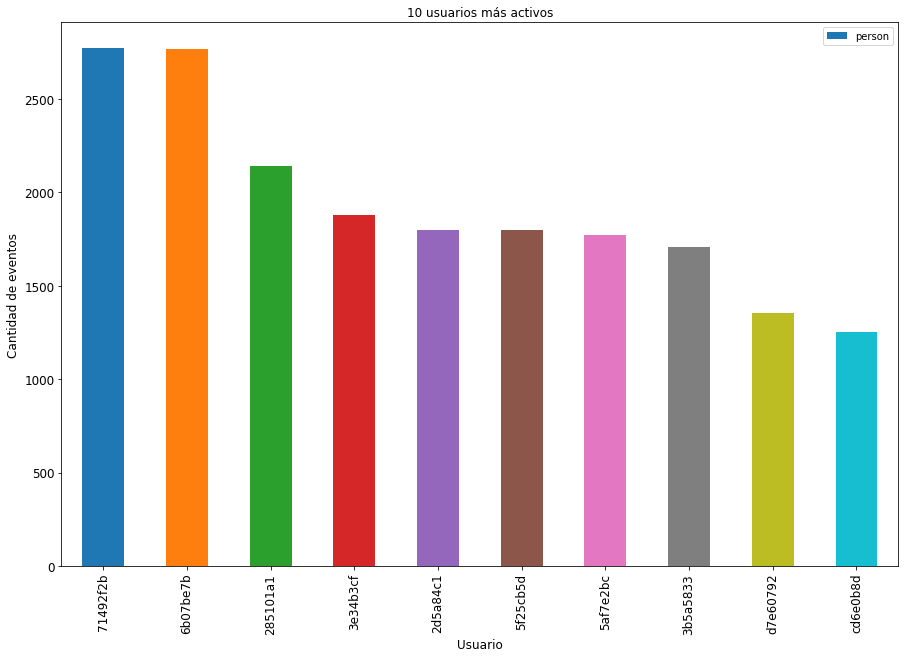

In [11]:
ax = usuarios_mas_activos.plot(kind='bar', title ="10 usuarios más activos", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Usuario", fontsize=12)
ax.set_ylabel("Cantidad de eventos", fontsize=12)
plt.show()